In [1]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Input,Lambda,Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from random import randint
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
image_size=[224,224]
train_sample='Datasets/Train/'
test_sample='Datasets/Test'
vgg=VGG16(input_shape=image_size +[3],weights='imagenet',include_top=False)
type(train_sample)

In [3]:
from glob import glob
for layer in vgg.layers:
    layer.trainable=False
folders=glob('Datasets/Train/*')
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)


In [4]:
from keras.preprocessing.image import ImageDataGenerator


In [9]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [23]:

trained_data=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)
test_data=ImageDataGenerator(rescale=1./255)
training_set=trained_data.flow_from_directory('Datasets/Train',target_size=(224,224),batch_size=10,class_mode='categorical')
test_set=test_data.flow_from_directory('Datasets/Test',target_size=(224,224),batch_size=10,class_mode='categorical')



Found 135 images belonging to 1 classes.
Found 23 images belonging to 1 classes.


In [24]:
r=model.fit(
training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/5
14/14 [==============================] - 26s 2s/step - loss: 0.1065 - accuracy: 0.0741 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
14/14 [==============================] - 26s 2s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
14/14 [==============================] - 25s 2s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
14/14 [==============================] - 25s 2s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
14/14 [==============================] - 24s 2s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


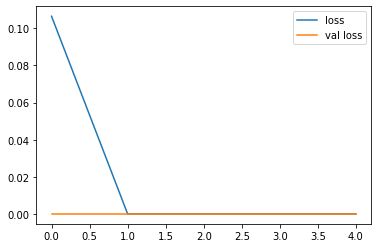

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val loss")
plt.legend()
plt.show()
plt.savefig('val loss,loss')

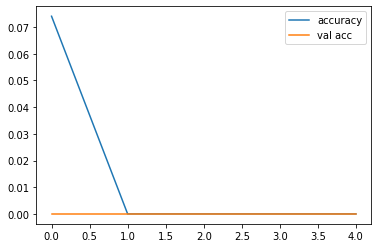

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(r.history['accuracy'],label="accuracy")
plt.plot(r.history['val_accuracy'],label="val acc")
plt.legend()
plt.show()
plt.savefig('val acc,acc')

In [80]:
model.save('facefeature.h5')

In [21]:
label

NameError: name 'label' is not defined